Goal of the research paper - what specific problem is being analyzed and in what way

Abstract

## A
### A.1
To use the gradient machinery we need the cost/loss functions with respective gradients:
- Mean Squared Error
- Log loss, with and without $L_1$ and $L_2$
- The multiclass cross entropy cost/loss function

Needs to be explained in the methods section 


#### Methods

#### Code

In [6]:
import numpy as np
#Code section 
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))
# see https://medium.com/data-science/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1



# Not relevant to this project
def log_loss(y_true, y_pred, regularization=None, weights=None, lambda_reg=0.01):
    # Clipping it using epsilon to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    m = len(y_true)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    if regularization == "L1" and weights is not None:
        loss += (lambda_reg / (2 * m)) * np.sum(np.abs(weights))
    elif regularization == "L2" and weights is not None:
        loss += (lambda_reg / (2 * m)) * np.sum(np.square(weights))
    return loss

#### Results - comparison

### A.2 - Activation Functions
Set up the expression and their first derivative for the following activation functions:
- Sigmoid
- RELU
- Leaky RELU

#### Methods

#### Code

In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def der_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

def ReLu(z):
    return np.where(z > 0, z, 0)

def der_ReLu(X):
    return np.where(X > 0, 1, 0)

def LeakyReLu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def der_LeakyReLu(X, alpha=0.01):
    return np.where(X > 0, 1, alpha)


#### Results - comparison

## B


Use only the mean-squared error as cost function (no regularization terms) and 
write an FFNN code for a regression problem with a flexible number of hidden
layers and nodes using only the Sigmoid function as activation function for
the hidden layers. Initialize the weights using a normal
distribution. How would you initialize the biases? And which
activation function would you select for the final output layer?
And how would you set up your design/feature matrix? Hint: does it have to represent a polynomial approximation as you did in project 1? 

Train your network and compare the results with those from your OLS
regression code from project 1 using the one-dimensional Runge
function.  When comparing your neural network code with the OLS
results from project 1, use the same data sets which gave you the best
MSE score. Moreover, use the polynomial order from project 1 that gave you the
best result.  Compare these results with your neural network with one
and two hidden layers using $50$ and $100$ hidden nodes, respectively.

Comment your results and give a critical discussion of the results
obtained with the OLS code from project 1 and your own neural network
code.  Make an analysis of the learning rates employed to find the
optimal MSE score. Test both stochastic gradient descent
with RMSprop and ADAM and plain gradient descent with different
learning rates.

You should, as you did in project 1, scale your data.

### Methods


### Code
Should i use the same sparse data-set as i did in the earlier report or perhaps change it up? Maybe have an example on how it works on a large dataset?

In [6]:
# Verified code section
from Functions import NeuralNetwork, mse, der_mse, ReLU, der_ReLU, linear, der_linear, dataset
import numpy as np
# 1. Create a dataset
n_samples = 100
x, y_true, y_noise = dataset(n_samples)
X = x.reshape(-1, 1) # Feature matrix (n_samples, 1)

# 2. Define Network Architecture
n_inputs = 1
layer_sizes = [20, 10, 1] # Two hidden layers, one output node
activations = [ReLU, ReLU, linear]
activation_ders = [der_ReLU, der_ReLU, der_linear]
cost_func = mse
cost_der_func = der_mse

# 3. Initialize the Neural Network
nn = NeuralNetwork(
    network_input_size=n_inputs,
    layer_output_sizes=layer_sizes,
    activation_funcs=activations,
    activation_ders=activation_ders,
    cost_fun=cost_func,
    cost_der=cost_der_func,
    seed=42
)
# 4. Test the manual gradient
manual_grads = nn.compute_gradient(X, y_noise)
auto_grads = nn.autograd_gradient(X, y_noise)
print("\n--- Comparing Gradients (L2 norm of difference) ---")
for i in range(len(manual_grads)):
    manual_W, manual_b = manual_grads[i]
    auto_W, auto_b = auto_grads[i]
    
    diff_W = np.linalg.norm(manual_W - auto_W)
    diff_b = np.linalg.norm(manual_b - auto_b)
    
    print(f"Layer {i}:")
    print(f"  W_diff: {diff_W}")
    print(f"  b_diff: {diff_b}")
    
    if diff_W > 1e-10 or diff_b > 1e-10:
        print(f"  WARNING: Large difference found in layer {i}!")
    else:
        print(f"  Gradients match!")
# 5. Testing Training loop
print("\n--- Simple Training Example ---")
learning_rate = 0.001
epochs = 100

initial_cost = nn.cost(X, y_noise)
print(f"Epoch 0, Cost: {initial_cost}")

for i in range(epochs):
    # Use autograd gradient (or manual_grads, they should be the same)
    grads = nn.compute_gradient(X, y_noise)
    
    # Update weights
    grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
    nn.update_weights(grads)
    
    if (i+1) % 20 == 0:
        cost_val = nn.cost(X, y_noise)
        print(f"Epoch {i+1}, Cost: {cost_val}")
        
final_cost = nn.cost(X, y_noise)
print(f"Training complete. Final Cost: {final_cost}")
print(f"Cost reduced: {initial_cost > final_cost}")


--- Comparing Gradients (L2 norm of difference) ---
Layer 0:
  W_diff: 1.2119809160162261e-17
  b_diff: 9.670986140218852e-17
  Gradients match!
Layer 1:
  W_diff: 2.3351598139465184e-17
  b_diff: 1.0203949608775757e-16
  Gradients match!
Layer 2:
  W_diff: 7.217888169571747e-18
  b_diff: 0.0
  Gradients match!

--- Simple Training Example ---
Epoch 0, Cost: 0.17408422380783808
Epoch 20, Cost: 0.16700745230415598
Epoch 40, Cost: 0.16079287299904554
Epoch 60, Cost: 0.1550729158825161
Epoch 80, Cost: 0.1497816455343196
Epoch 100, Cost: 0.14487091078173753
Training complete. Final Cost: 0.14487091078173753
Cost reduced: True


#### Verifying best case from project 1 with heatmap
Sparse result is polynomial 10 and for best result is N = 60 and p=19
- -3.146474580720095 (Sparse N=18, p=10, seed= 42)
- -3.810414353739059 (N=60, p=19, seed=42)


Testing layer sizes: 1
  Testing layer nodes: 50
  Testing layer nodes: 100

Testing layer sizes: 2
  Testing layer nodes: 50
  Testing layer nodes: 100


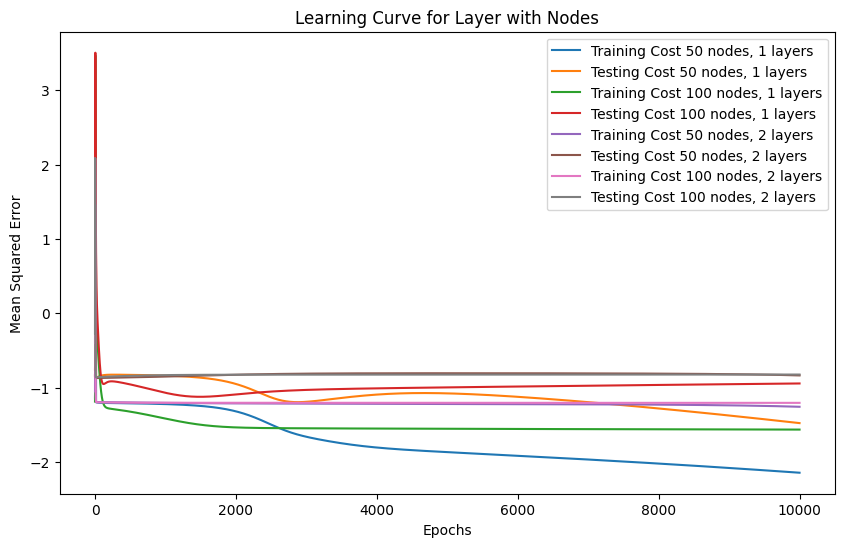

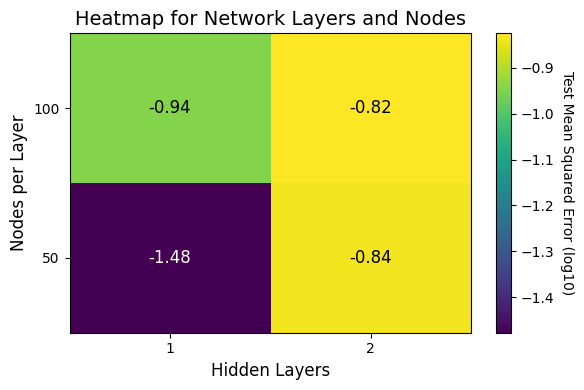

In [30]:
# Building the plot for 50 to 100 hidden nodes and one to two layers for N=18
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset
import numpy as np
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
n_samples = 18
x, y_true, y_noise = dataset(n_samples,seed =42)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_true - np.mean(y_true)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Network Architecture
n_inputs = 1
cost_func = mse
cost_der_func = der_mse


# Finding Optimal Parameters
tries_layers = [1,2] 
tries_layer_nodes = [50, 100 ]

mse_matrix = np.zeros((len(tries_layer_nodes), len(tries_layers)))


plt.figure(figsize=(10, 6))

best_model = None
best_cost = float('inf')

for layer in tries_layers:
    print(f"\nTesting layer sizes: {layer}")
    for layer_nodes in tries_layer_nodes:
        print(f"  Testing layer nodes: {layer_nodes}")
        layer_sizes_list = [layer_nodes] * layer + [1]

        nn = NeuralNetwork(
            network_input_size=n_inputs,
            layer_output_sizes=[layer_nodes] * layer + [1],
            activation_funcs=[sigmoid] * layer + [linear],
            activation_ders=[der_sigmoid] * layer + [der_linear],
            cost_fun=cost_func,
            cost_der=cost_der_func,
            seed=42
        )
        training_scores = []
        testing_scores = []
        
        learning_rate = 0.1
        epochs = 10000

        
        
        for i in range(epochs):
            grads = nn.compute_gradient(X_train, y_train)
            grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
            training_scores.append(nn.cost(X_train, y_train))
            testing_scores.append(nn.cost(X_test, y_test))
            nn.update_weights(grads)
            if nn.cost(X_test, y_test) < best_cost:
                best_cost = nn.cost(X_test, y_test)
                best_model = copy.deepcopy(nn)

        training_scores = np.log10(training_scores)
        testing_scores = np.log10(testing_scores)
        plt.plot(training_scores, label=f'Training Cost {layer_nodes} nodes, {layer} layers')
        plt.plot(testing_scores, label=f'Testing Cost {layer_nodes} nodes, {layer} layers')


        final_cost = nn.cost(X_test, y_test)

        mse_matrix[tries_layer_nodes.index(layer_nodes), tries_layers.index(layer)] = final_cost

plt.title(f'Learning Curve for Layer with Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
# Training and Testing Costs



# MSE Heatmap
plot_mse = np.log10(mse_matrix)
fig, ax = plt.subplots(figsize=(6,4))

# Use default indexing for imshow, don't set extent
c = ax.imshow(plot_mse, aspect='auto', cmap='viridis', origin='lower')

# Set the ticks to be at the center of the pixels (0, 1, etc.)
ax.set_xticks(np.arange(len(tries_layers)))
ax.set_yticks(np.arange(len(tries_layer_nodes)))

# Set the *labels* for those ticks
ax.set_xticklabels(tries_layers)
ax.set_yticklabels(tries_layer_nodes)

# Set labels and titles
ax.set_title('Heatmap for Network Layers and Nodes', fontsize=14)
ax.set_xlabel('Hidden Layers', fontsize=12)
ax.set_ylabel('Nodes per Layer', fontsize=12)

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log10)', rotation=-90, va="bottom")

threshold = np.nanmean(plot_mse) 
for i in range(len(tries_layer_nodes)):
    for j in range(len(tries_layers)):   
        val = plot_mse[i, j]
        if np.isfinite(val): 
            color = "w" if val < threshold else "k" 
            # Use j for x-coordinate, i for y-coordinate
            text = ax.text(j, i, f"{val:.2f}",
                           ha="center", va="center", color=color, fontsize=12)

plt.tight_layout()
plt.savefig('MSE_Heatmap_Layers_Nodes.png')
plt.show()

THe above is interesting as wee see that it is stuggeling to learn i.e. gradient explosion as was the case for why it was little used before 2010


Testing layer sizes: 1
  Testing layer nodes: 50
  Testing layer nodes: 100

Testing layer sizes: 2
  Testing layer nodes: 50
  Testing layer nodes: 100


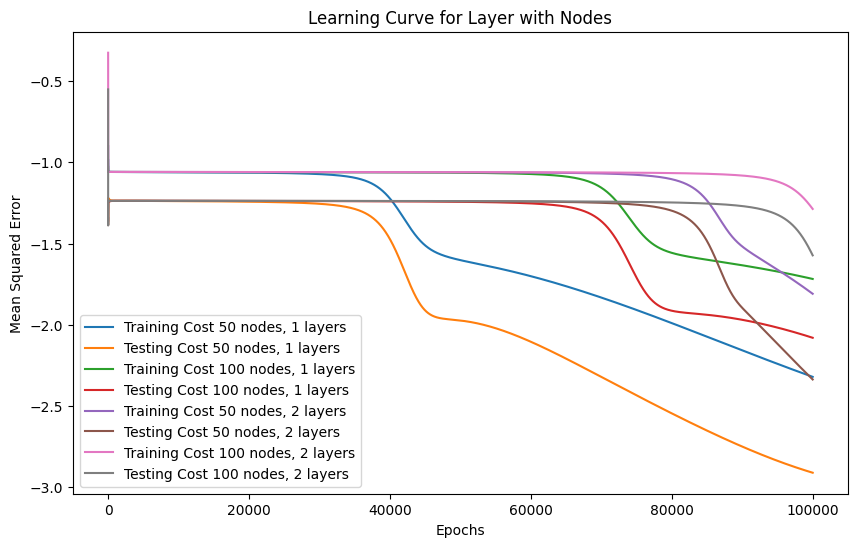

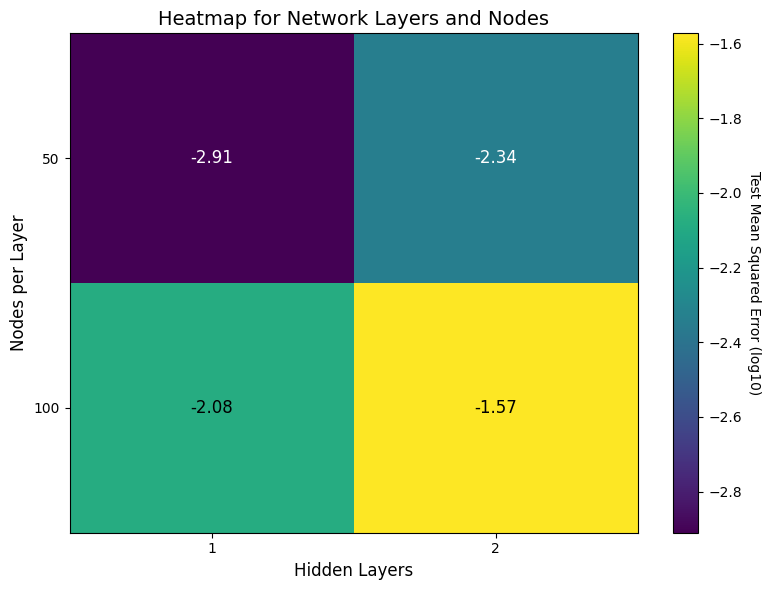

In [4]:
# Building the plot for 50 to 100 hidden nodes and one to two layers for N=60
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
n_samples = 60
x, y_true, y_noise = dataset(n_samples,seed =42)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_true - np.mean(y_true)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Network Architecture
n_inputs = 1
cost_func = mse
cost_der_func = der_mse


# Finding Optimal Parameters
tries_layers = [1,2] 
tries_layer_nodes = [50, 100 ]

mse_matrix = np.zeros((len(tries_layer_nodes), len(tries_layers)))


plt.figure(figsize=(10, 6))


for layer in tries_layers:
    print(f"\nTesting layer sizes: {layer}")
    for layer_nodes in tries_layer_nodes:
        print(f"  Testing layer nodes: {layer_nodes}")
        layer_sizes_list = [layer_nodes] * layer + [1]

        nn = NeuralNetwork(
            network_input_size=n_inputs,
            layer_output_sizes=[layer_nodes] * layer + [1],
            activation_funcs=[sigmoid] * layer + [linear],
            activation_ders=[der_sigmoid] * layer + [der_linear],
            cost_fun=cost_func,
            cost_der=cost_der_func,
            seed=42
        )
        training_scores = []
        testing_scores = []
        
        learning_rate = 0.01
        epochs = 100000
        
        for i in range(epochs):
            grads = nn.compute_gradient(X_train, y_train)
            grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
            training_scores.append(nn.cost(X_train, y_train))
            testing_scores.append(nn.cost(X_test, y_test))
            nn.update_weights(grads)

        training_scores = np.log10(training_scores)
        testing_scores = np.log10(testing_scores)
        plt.plot(training_scores, label=f'Training Cost {layer_nodes} nodes, {layer} layers')
        plt.plot(testing_scores, label=f'Testing Cost {layer_nodes} nodes, {layer} layers')


        final_cost = nn.cost(X_test, y_test)

        mse_matrix[tries_layer_nodes.index(layer_nodes), tries_layers.index(layer)] = final_cost

plt.title(f'Learning Curve for Layer with Nodes')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
# Training and Testing Costs



# MSE Heatmap
plot_mse = np.log10(mse_matrix)
fig, ax = plt.subplots(figsize=(8,6))

# Use default indexing for imshow, don't set extent
c = ax.imshow(plot_mse, aspect='auto', cmap='viridis')

# Set the ticks to be at the center of the pixels (0, 1, etc.)
ax.set_xticks(np.arange(len(tries_layers)))
ax.set_yticks(np.arange(len(tries_layer_nodes)))

# Set the *labels* for those ticks
ax.set_xticklabels(tries_layers)
ax.set_yticklabels(tries_layer_nodes)

# Set labels and titles
ax.set_title('Heatmap for Network Layers and Nodes', fontsize=14)
ax.set_xlabel('Hidden Layers', fontsize=12)
ax.set_ylabel('Nodes per Layer', fontsize=12)

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log10)', rotation=-90, va="bottom")

# --- THIS IS THE CORRECTED ANNOTATION LOOP ---
# Now (j, i) maps directly to the pixel coordinates
threshold = np.nanmean(plot_mse) 
for i in range(len(tries_layer_nodes)): # i = 0, 1 (rows, for nodes)
    for j in range(len(tries_layers)):   # j = 0, 1 (cols, for layers)
        val = plot_mse[i, j]
        if np.isfinite(val): # Only plot finite numbers
            color = "w" if val < threshold else "k" 
            # Use j for x-coordinate, i for y-coordinate
            text = ax.text(j, i, f"{val:.2f}",
                           ha="center", va="center", color=color, fontsize=12)

plt.tight_layout()
plt.show()

Whatever i choose here i should also do a bias-varaince analysis on the results to make sure i am using the correct information.

#### Testing different Learning rates, and methods to find optimal mse


Testing learning rate: 1

Testing learning rate: 0.5

Testing learning rate: 0.2

Testing learning rate: 0.15

Testing learning rate: 0.1

Testing learning rate: 0.01

Testing learning rate: 0.001


<Figure size 1000x600 with 0 Axes>

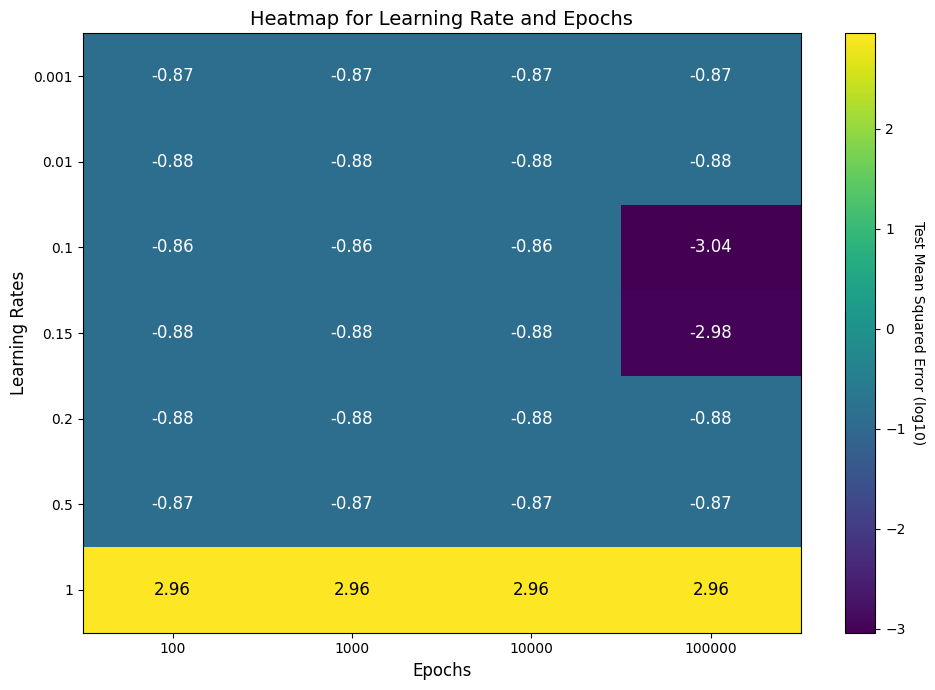

In [32]:
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

n_samples = 18
x, y_true, y_noise = dataset(n_samples)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_true - np.mean(y_true)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Network Architecture
n_inputs = 1
learning_rates = [ 1,0.5,0.2,0.15,0.1, 0.01, 0.001]
epochs = [100, 1000, 10000, 100000]
layer_output_sizes = [100, 100, 1]
activations = [sigmoid, sigmoid, linear]
activation_ders = [der_sigmoid, der_sigmoid, der_linear]
cost_func = mse
cost_der_func = der_mse


# Finding Optimal Parameters
tries_layers = [1,2] 
tries_layer_nodes = [50, 100]

mse_matrix = np.zeros((len(learning_rates), len(epochs)))


plt.figure(figsize=(10, 6))

best_score = float('inf')

for n_i, learning_rate in enumerate(learning_rates):
    print(f"\nTesting learning rate: {learning_rate}")
    best_score = float('inf')
    for n_j, epoch in enumerate(epochs):

        nn = NeuralNetwork(
            network_input_size=n_inputs,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activations,
            activation_ders=activation_ders,
            cost_fun=cost_func,
            cost_der=cost_der_func,
            seed=42
        )
        training_scores = []
        testing_scores = []
        
        for i in range(epoch):
            grads = nn.compute_gradient(X_train, y_train)
            grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
            nn.update_weights(grads)
            training_scores.append(nn.cost(X_train, y_train))
            testing_scores.append(nn.cost(X_test, y_test))
            if nn.cost(X_test, y_test) < best_score:
                best_score = nn.cost(X_test, y_test)


        mse_matrix[n_i, n_j] = best_score


# Training and Testing Costs



# MSE Heatmap
plot_mse = np.log10(mse_matrix)
plot_mse[plot_mse > 10] = np.nan
fig, ax = plt.subplots(figsize=(10, 7))

# Use imshow, which is better for this type of matrix. Removed 'extent'.
c = ax.imshow(plot_mse, cmap='viridis', aspect='auto', origin='lower')

# Set labels and titles
ax.set_title('Heatmap for Learning Rate and Epochs', fontsize=14)
ax.set_xlabel('Epochs', fontsize=12)
ax.set_ylabel('Learning Rates', fontsize=12)

# Set tick labels to match the grid search
ax.set_xticks(np.arange(len(epochs)))
ax.set_xticklabels(epochs)
ax.set_yticks(np.arange(len(learning_rates)))
ax.set_yticklabels(learning_rates)

# 6. FIX: Add text labels to each cell
threshold = np.nanmean(plot_mse) # Use nanmean to avoid issues with inf
for i in range(len(learning_rates)):
    for j in range(len(epochs)):
        val = plot_mse[i, j]
        if np.isfinite(val): # Only plot finite numbers
            color = "w" if val < threshold else "k" 
            text = ax.text(j, i, f"{val:.2f}",
                           ha="center", va="center", color=color, fontsize=12)

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log10)', rotation=-90, va="bottom")

plt.tight_layout()
plt.show()






Testing learning rate: 1
  Testing method: SGD


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


    Time taken: 0.6838 seconds
  Testing method: RMSprop
    Time taken: 0.9243 seconds
  Testing method: Adam
    Time taken: 1.0260 seconds
  Testing method: GD
    Time taken: 0.2621 seconds

Testing learning rate: 0.1
  Testing method: SGD
    Time taken: 0.6041 seconds
  Testing method: RMSprop
    Time taken: 0.8007 seconds
  Testing method: Adam
    Time taken: 0.9829 seconds
  Testing method: GD
    Time taken: 0.2193 seconds

Testing learning rate: 0.01
  Testing method: SGD
    Time taken: 0.6117 seconds
  Testing method: RMSprop
    Time taken: 0.8173 seconds
  Testing method: Adam
    Time taken: 0.9930 seconds
  Testing method: GD
    Time taken: 0.2161 seconds

Testing learning rate: 0.001
  Testing method: SGD
    Time taken: 0.4960 seconds
  Testing method: RMSprop
    Time taken: 0.6200 seconds
  Testing method: Adam
    Time taken: 0.8611 seconds
  Testing method: GD
    Time taken: 0.1681 seconds


<Figure size 1000x600 with 0 Axes>

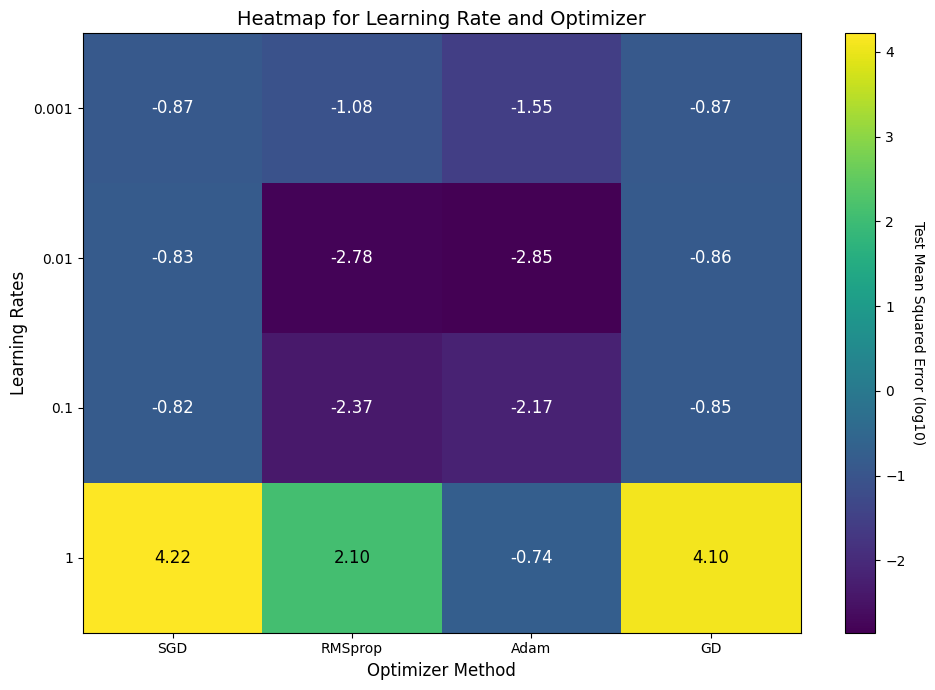

In [12]:
# Different gradient descent methods and learning rates

import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

np.random.seed(42)

n_samples = 18
x, y_true, y_noise = dataset(n_samples)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_true - np.mean(y_true)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Network Architecture
n_inputs = 1
learning_rates = [ 1,0.1, 0.01, 0.001]
methods = ['SGD', 'RMSprop', 'Adam', 'GD']
epochs = 1000
layer_output_sizes = [50, 50, 1]
activations = [sigmoid, sigmoid, linear]
activation_ders = [der_sigmoid, der_sigmoid, der_linear]
cost_func = mse
cost_der_func = der_mse

batch_size = 5

# Finding Optimal Parameters
tries_layers = [1,2] 
tries_layer_nodes = [50, 100]

mse_matrix = np.zeros((len(learning_rates), len(methods)))


# Optimizer hyperparameters
epsilon = 1e-8
# RMSprop
beta_rms = 0.9
# Adam
beta1_adam = 0.9
beta2_adam = 0.999


plt.figure(figsize=(10, 6))


for n_i, learning_rate in enumerate(learning_rates):
    print(f"\nTesting learning rate: {learning_rate}")
    for n_j, method in enumerate(methods):
        print(f"  Testing method: {method}")
        start_time = time.perf_counter() # Using perf_counter for more precise measurements
        nn = NeuralNetwork(
            network_input_size=n_inputs,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activations,
            activation_ders=activation_ders,
            cost_fun=cost_func,
            cost_der=cost_der_func,
            seed=42
        )
        if method == 'RMSprop':
            # List of (w, b) tuples for squared gradient averages
            Eg = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
        elif method == 'Adam':
            # Lists for 1st and 2nd moment estimates
            m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            t = 0 # Adam's timestep counter


        for i in range(epochs):

            if method == 'GD' :
                grads = nn.compute_gradient(X_train, y_train)
                grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                nn.update_weights(grads)
            else:
                # Stochastic methods with mini-batches
                n_samples = X_train.shape[0]
                indices = np.arange(n_samples)
                np.random.shuffle(indices)
                X_train_shuffled = X_train[indices]
                y_train_shuffled = y_train[indices]

                # 2. Loop over mini-batches
                for start_idx in range(0, n_samples, batch_size):
                    # Get the mini-batch
                    end_idx = min(start_idx + batch_size, n_samples)
                    X_batch = X_train_shuffled[start_idx:end_idx]
                    y_batch = y_train_shuffled[start_idx:end_idx]

                    grads = nn.compute_gradient(X_batch, y_batch)
                    update = []
                    if method == 'SGD':
                        # Standard SGD update
                        update = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                    elif method == 'RMSprop':
                        for l in range(len(grads)):
                            (dW, db) = grads[l]
                            (Eg_w, Eg_b) = Eg[l] # Get state

                            # Update state
                            Eg_w = beta_rms * Eg_w + (1 - beta_rms) * (dW**2)
                            Eg_b = beta_rms * Eg_b + (1 - beta_rms) * (db**2)
                            Eg[l] = (Eg_w, Eg_b) # Save state

                            # Compute update
                            update_dW = (learning_rate / (np.sqrt(Eg_w + epsilon))) * dW
                            update_db = (learning_rate / (np.sqrt(Eg_b + epsilon))) * db
                            update.append((update_dW, update_db))
                    elif method == 'Adam':
                        t += 1 # Increment timestep (one per batch)
                        for l in range(len(grads)):
                            dW, db = grads[l]
                            m_w, m_b = m[l] # Get 1st moment
                            v_w, v_b = v[l] # Get 2nd moment

                            # 1. Update biased 1st moment estimate
                            m_w = beta1_adam * m_w + (1 - beta1_adam) * dW
                            m_b = beta1_adam * m_b + (1 - beta1_adam) * db
                            
                            # 2. Update biased 2nd moment estimate
                            v_w = beta2_adam * v_w + (1 - beta2_adam) * (dW**2)
                            v_b = beta2_adam * v_b + (1 - beta2_adam) * (db**2)

                            # Store updated moments
                            m[l] = (m_w, m_b)
                            v[l] = (v_w, v_b)

                            # 3. Bias correction
                            m_w_corr = m_w / (1 - beta1_adam**t)
                            m_b_corr = m_b / (1 - beta1_adam**t)
                            v_w_corr = v_w / (1 - beta2_adam**t)
                            v_b_corr = v_b / (1 - beta2_adam**t)

                            # 4. Compute update step
                            update_dW = (learning_rate / (np.sqrt(v_w_corr) + epsilon)) * m_w_corr
                            update_db = (learning_rate / (np.sqrt(v_b_corr) + epsilon)) * m_b_corr
                            update.append((update_dW, update_db))
                    nn.update_weights(update)
                    
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"    Time taken: {elapsed_time:.4f} seconds")
        final_cost = nn.cost(X_test, y_test)

        mse_matrix[n_i, n_j] = final_cost





# MSE Heatmap
plot_mse = np.log10(mse_matrix, where=mse_matrix > 0, out=np.full_like(mse_matrix, np.nan))

fig, ax = plt.subplots(figsize=(10, 7))
c = ax.imshow(plot_mse, cmap='viridis', aspect='auto', origin='lower')

# Set labels and titles
ax.set_title('Heatmap for Learning Rate and Optimizer', fontsize=14)
# FIX: X-axis is methods, not epochs
ax.set_xlabel('Optimizer Method', fontsize=12)
ax.set_ylabel('Learning Rates', fontsize=12)

# FIX: Set tick labels to match the grid search
ax.set_xticks(np.arange(len(methods)))
ax.set_xticklabels(methods)
ax.set_yticks(np.arange(len(learning_rates)))
ax.set_yticklabels(learning_rates)

# FIX: Add text labels to each cell
threshold = np.nanmean(plot_mse) # Use nanmean to avoid issues
# FIX: Loop over methods, not epochs
for i in range(len(learning_rates)):
    for j in range(len(methods)):
        val = plot_mse[i, j]
        if np.isfinite(val): # Only plot finite numbers
            color = "w" if val < threshold else "k"
            text = ax.text(j, i, f"{val:.2f}",
                           ha="center", va="center", color=color, fontsize=12)

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log10)', rotation=-90, va="bottom")

plt.tight_layout()
plt.show()




### Results

Really interesting result with regards to what learning rate is best etc..


We do not extract a polynomial structure for the input variables in the neural network as we let the neural network find out what the structure should be for best predicting the out put variables. 

## C
Test the code in B against Scikit-learn, take training time and results, maybe also keras and pytorch.

Test that the derivatives are correct using autograd

### Methods Code Comparison

In [31]:
# Verifing Gradients using autograd
from Functions import NeuralNetwork, mse, der_mse, ReLU, der_ReLU, linear, der_linear, dataset
import numpy as np
# 1. Create a dataset
n_samples = 100
x, y_true, y_noise = dataset(n_samples)
X = x.reshape(-1, 1) # Feature matrix (n_samples, 1)

# 2. Define Network Architecture
n_inputs = 1
layer_sizes = [20, 10, 1] # Two hidden layers, one output node
activations = [ReLU, ReLU, linear]
activation_ders = [der_ReLU, der_ReLU, der_linear]
cost_func = mse
cost_der_func = der_mse

# 3. Initialize the Neural Network
nn = NeuralNetwork(
    network_input_size=n_inputs,
    layer_output_sizes=layer_sizes,
    activation_funcs=activations,
    activation_ders=activation_ders,
    cost_fun=cost_func,
    cost_der=cost_der_func,
    seed=42
)
# 4. Test the manual gradient
manual_grads = nn.compute_gradient(X, y_noise)
auto_grads = nn.autograd_gradient(X, y_noise)
print("\n--- Comparing Gradients (L2 norm of difference) ---")
for i in range(len(manual_grads)):
    manual_W, manual_b = manual_grads[i]
    auto_W, auto_b = auto_grads[i]
    
    diff_W = np.linalg.norm(manual_W - auto_W)
    diff_b = np.linalg.norm(manual_b - auto_b)
    
    print(f"Layer {i}:")
    print(f"  W_diff: {diff_W}")
    print(f"  b_diff: {diff_b}")
    
    if diff_W > 1e-10 or diff_b > 1e-10:
        print(f"  WARNING: Large difference found in layer {i}!")
    else:
        print(f"  Gradients match!")


--- Comparing Gradients (L2 norm of difference) ---
Layer 0:
  W_diff: 2.237726045655905e-16
  b_diff: 9.961119953842058e-16
  Gradients match!
Layer 1:
  W_diff: 5.419449386414209e-16
  b_diff: 4.440892098500626e-16
  Gradients match!
Layer 2:
  W_diff: 8.881784197001252e-16
  b_diff: 0.0
  Gradients match!


In [24]:
# Verified code section
from Functions import NeuralNetwork, mse, der_mse, ReLU, der_ReLU, linear,sigmoid, der_sigmoid, der_linear, dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 1. Create a dataset
n_samples = 100
x, y_true, y_noise = dataset(n_samples)
X = x.reshape(-1, 1) # Feature matrix (n_samples, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y_true - np.mean(y_true)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Define Network Architecture
n_inputs = 1
layer_sizes = [20, 10, 1] # Two hidden layers, one output node
activations = [sigmoid, sigmoid, linear]
activation_ders = [der_sigmoid, der_sigmoid, der_linear]
cost_func = mse
cost_der_func = der_mse

# 3. Initialize the Neural Network
nn = NeuralNetwork(
    network_input_size=n_inputs,
    layer_output_sizes=layer_sizes,
    activation_funcs=activations,
    activation_ders=activation_ders,
    cost_fun=cost_func,
    cost_der=cost_der_func,
    seed=42
)
# 5. Testing Training loop
print("--- Simple Training Comparison with scikit-learn ---")
learning_rate = 0.1
epochs = 100000



for i in range(epochs):
    # Use autograd gradient (or manual_grads, they should be the same)
    grads = nn.compute_gradient(X_train, y_train)
    
    # Update weights
    grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
    nn.update_weights(grads)


        

final_cost = nn.cost(X_test, y_test)

from sklearn.neural_network import MLPRegressor
# store models for later use
dnn = MLPRegressor(hidden_layer_sizes=(20,10), activation='logistic', solver='sgd',
                             learning_rate_init=learning_rate, learning_rate='constant', max_iter=epochs, random_state=42,
                             batch_size=X_train.shape[0],
                             alpha=0.0,
                             tol=1e-10000,
                             early_stopping=False, verbose=False)
dnn.fit(X_train, y_train)

# Get Test MSE from your nn

print(f"Your NeuralNetwork Test MSE: {final_cost:.6f}")

# Get Test MSE from scikit-learn's dnn
dnn_pred = dnn.predict(X_test)
dnn_test_mse = mse(y_test, dnn_pred)
print(f"SKLearn MLPRegressor Test MSE: {dnn_test_mse:.6f}")

--- Simple Training Comparison with scikit-learn ---


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your NeuralNetwork Test MSE: 0.018042
SKLearn MLPRegressor Test MSE: 0.140390


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(


## D
Different activation functions for the hidden layers, Sigmoid, Relu and Leaky Relu

### Code
Using the best results from above i.e. Adam , or looking at it based on:

MUST
- Layers 
- Nodes

Perhaps
- learning rate
- iterations



Testing learning rate: 1
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.9225 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 5.8765 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 6.3967 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 5.2276 seconds

Testing learning rate: 0.1
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 5.7460 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 5.6329 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 6.0186 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 5.0734 seconds

Testing learning rate: 0.01
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 5.9156 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 5.9905 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 6.4095 seconds
  Testing metho

<Figure size 1000x600 with 0 Axes>

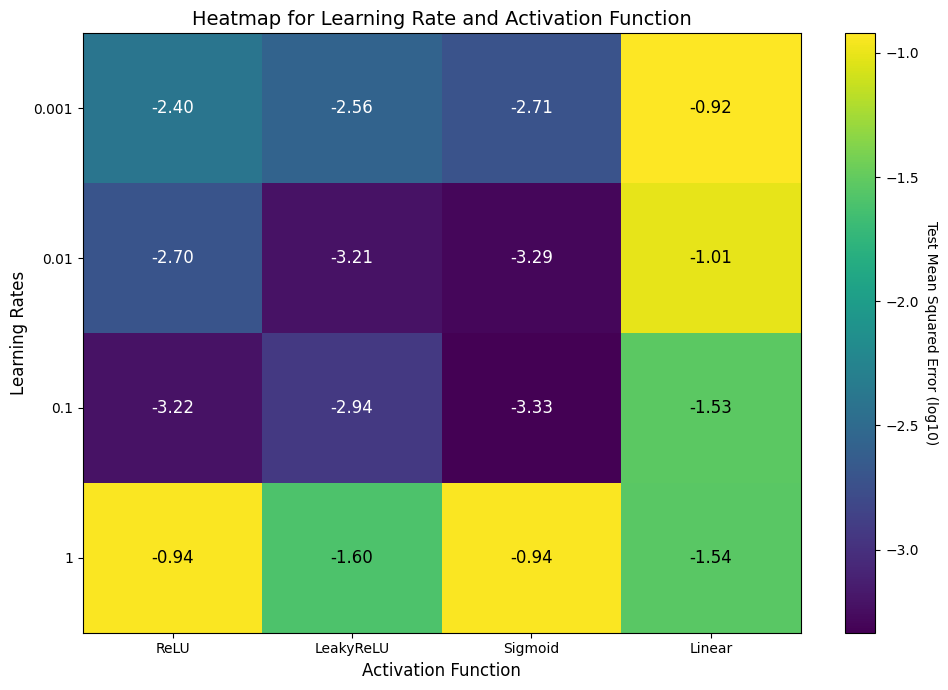

In [35]:
# Different gradient descent methods and learning rates NOT DONE
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset, ReLU, der_ReLU, LeakyReLu, der_LeakyReLu
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

np.random.seed(42)

n_samples = 18

x, y_true, y_noise = dataset(n_samples)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_noise - np.mean(y_noise)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Network Architecture
n_inputs = 1
learning_rates = [ 1,0.1, 0.01, 0.001]
methods = ['SGD', 'RMSprop', 'Adam', 'GD']
activationFunction = [[ReLU, der_ReLU], [LeakyReLu, der_LeakyReLu], [sigmoid, der_sigmoid], [linear, der_linear]]
Activation_Names = ["ReLU", "LeakyReLU", "Sigmoid", "Linear"]
Regularization = [None, "L1", "L2"]
Regularization_names = ["No Reg", "L1", "L2"]

epochs = 10000
layer_output_sizes = [50, 50, 1]
activations = [sigmoid, sigmoid, linear]
activation_ders = [der_sigmoid, der_sigmoid, der_linear]
cost_func = mse
cost_der_func = der_mse

mse_matrix = np.zeros((len(learning_rates), len(Activation_Names)))


method = 'Adam'
# Optimizer 
batch_size = 10
epsilon = 1e-8
# RMSprop
beta_rms = 0.9
# Adam
beta1_adam = 0.9
beta2_adam = 0.999


plt.figure(figsize=(10, 6))


for n_i, learning_rate in enumerate(learning_rates):
    print(f"\nTesting learning rate: {learning_rate}")
    for n_j, activation in enumerate(activationFunction):
        print(f"  Testing method: {methods}")
        start_time = time.perf_counter() # Using perf_counter for more precise measurements
        nn = NeuralNetwork(
            network_input_size=n_inputs,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=[activation[0]]*2 + [linear],
            activation_ders=[activation[1]]*2 + [der_linear],
            cost_fun=cost_func,
            cost_der=cost_der_func,
            seed=42
        )
        if method == 'RMSprop':
            # List of (w, b) tuples for squared gradient averages
            Eg = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
        elif method == 'Adam':
            # Lists for 1st and 2nd moment estimates
            m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            t = 0 # Adam's timestep counter

        best_score = float('inf')
        for i in range(epochs):
            
            if method == 'GD' :
                grads = nn.compute_gradient(X_train, y_train)
                grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                nn.update_weights(grads)
                if nn.cost(X_test, y_test) < best_score:
                    best_score = nn.cost(X_test, y_test)
            else:
                # Stochastic methods with mini-batches
                n_samples = X_train.shape[0]
                indices = np.arange(n_samples)
                np.random.shuffle(indices)
                X_train_shuffled = X_train[indices]
                y_train_shuffled = y_train[indices]

                # 2. Loop over mini-batches
                for start_idx in range(0, n_samples, batch_size):
                    # Get the mini-batch
                    end_idx = min(start_idx + batch_size, n_samples)
                    X_batch = X_train_shuffled[start_idx:end_idx]
                    y_batch = y_train_shuffled[start_idx:end_idx]

                    grads = nn.compute_gradient(X_batch, y_batch)
                    update = []
                    if method == 'SGD':
                        # Standard SGD update
                        update = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                    elif method == 'RMSprop':
                        for l in range(len(grads)):
                            (dW, db) = grads[l]
                            (Eg_w, Eg_b) = Eg[l] # Get state

                            # Update state
                            Eg_w = beta_rms * Eg_w + (1 - beta_rms) * (dW**2)
                            Eg_b = beta_rms * Eg_b + (1 - beta_rms) * (db**2)
                            Eg[l] = (Eg_w, Eg_b) # Save state

                            # Compute update
                            update_dW = (learning_rate / (np.sqrt(Eg_w + epsilon))) * dW
                            update_db = (learning_rate / (np.sqrt(Eg_b + epsilon))) * db
                            update.append((update_dW, update_db))
                    elif method == 'Adam':
                        t += 1 # Increment timestep (one per batch)
                        for l in range(len(grads)):
                            dW, db = grads[l]
                            m_w, m_b = m[l] # Get 1st moment
                            v_w, v_b = v[l] # Get 2nd moment

                            # 1. Update biased 1st moment estimate
                            m_w = beta1_adam * m_w + (1 - beta1_adam) * dW
                            m_b = beta1_adam * m_b + (1 - beta1_adam) * db
                            
                            # 2. Update biased 2nd moment estimate
                            v_w = beta2_adam * v_w + (1 - beta2_adam) * (dW**2)
                            v_b = beta2_adam * v_b + (1 - beta2_adam) * (db**2)

                            # Store updated moments
                            m[l] = (m_w, m_b)
                            v[l] = (v_w, v_b)

                            # 3. Bias correction
                            m_w_corr = m_w / (1 - beta1_adam**t)
                            m_b_corr = m_b / (1 - beta1_adam**t)
                            v_w_corr = v_w / (1 - beta2_adam**t)
                            v_b_corr = v_b / (1 - beta2_adam**t)

                            # 4. Compute update step
                            update_dW = (learning_rate / (np.sqrt(v_w_corr) + epsilon)) * m_w_corr
                            update_db = (learning_rate / (np.sqrt(v_b_corr) + epsilon)) * m_b_corr
                            update.append((update_dW, update_db))
                    nn.update_weights(update)
                    if nn.cost(X_test, y_test) < best_score:
                        best_score = nn.cost(X_test, y_test)
                    
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"    Time taken: {elapsed_time:.4f} seconds")
        final_cost = nn.cost(X_test, y_test)

        mse_matrix[n_i, n_j] = best_score

# MSE Heatmap
plot_mse = np.log10(mse_matrix, where=mse_matrix > 0, out=np.full_like(mse_matrix, np.nan))

fig, ax = plt.subplots(figsize=(10, 7))
c = ax.imshow(plot_mse, cmap='viridis', aspect='auto', origin='lower')

# Set labels and titles
ax.set_title('Heatmap for Learning Rate and Activation Function', fontsize=14)
# FIX: X-axis is methods, not epochs
ax.set_xlabel('Activation Function', fontsize=12)
ax.set_ylabel('Learning Rates', fontsize=12)

# FIX: Set tick labels to match the grid search
ax.set_xticks(np.arange(len(Activation_Names)))
ax.set_xticklabels(Activation_Names)
ax.set_yticks(np.arange(len(learning_rates)))
ax.set_yticklabels(learning_rates)

# FIX: Add text labels to each cell
threshold = np.nanmean(plot_mse) # Use nanmean to avoid issues
# FIX: Loop over methods, not epochs
for i in range(len(learning_rates)):
    for j in range(len(Activation_Names)):
        val = plot_mse[i, j]
        if np.isfinite(val): # Only plot finite numbers
            color = "w" if val < threshold else "k"
            text = ax.text(j, i, f"{val:.2f}",
                           ha="center", va="center", color=color, fontsize=12)

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log10)', rotation=-90, va="bottom")

plt.tight_layout()
plt.show()




### Results 
Bias variance trade-off analysis?


Probably not hetmaps for all maybe graphs with axis as nodes and lable as layers, 

## E
Testing different hyperparameter $\lambda, \eta, N(Layers), N(Height)$ For the L_1 and L_2 norms and compare them respectivly with what was found in project 1.



Testing regularization value: 0.5
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 21.3649 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 15.9329 seconds

Testing regularization value: 0.1
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 18.8615 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 15.7325 seconds

Testing regularization value: 0.01
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 18.9329 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 16.0931 seconds

Testing regularization value: 0.005
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 20.5631 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 17.3963 seconds

Testing regularization value: 0.001
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 19.9696 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 16.233

<Figure size 1000x600 with 0 Axes>

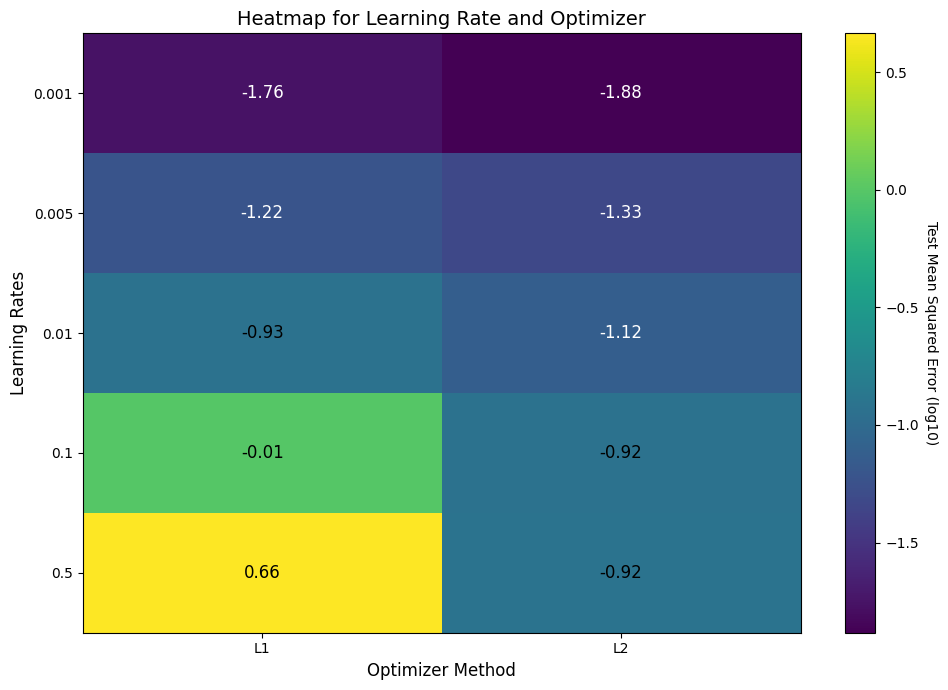

In [25]:
# Different gradient descent methods and learning rates NOT DONE
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset, ReLU, der_ReLU, LeakyReLu, der_LeakyReLu
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

np.random.seed(42)

n_samples = 18
x, y_true, y_noise = dataset(n_samples)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_noise - np.mean(y_noise)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Network Architecture
n_inputs = 1
learning_rates = [ 1,0.1, 0.01, 0.001]
methods = ['SGD', 'RMSprop', 'Adam', 'GD']
activationFunction = [[ReLU, der_ReLU], [LeakyReLu, der_LeakyReLu], [sigmoid, der_sigmoid], [linear, der_linear]]
Regularization = [ "L1", "L2"]
Regularization_names = [ "L1", "L2"]

epochs = 10000
layer_output_sizes = [100, 100, 1]
activations = [sigmoid, sigmoid, linear]
activation_ders = [der_sigmoid, der_sigmoid, der_linear]
cost_func = mse
cost_der_func = der_mse

regularization_values = [0.5, 0.1, 0.01, 0.005, 0.001]

mse_matrix = np.zeros((len(regularization_values), len(Regularization_names)))


method = 'Adam'
# Optimizer 
batch_size = 3
epsilon = 1e-8
# RMSprop
beta_rms = 0.9
# Adam
beta1_adam = 0.99
beta2_adam = 0.9999

learning_rate = 0.1

plt.figure(figsize=(10, 6))


for n_i, regularization_value in enumerate(regularization_values):
    print(f"\nTesting regularization value: {regularization_value}")
    for n_j, regularization in enumerate(Regularization):
        print(f"  Testing method: {methods}")
        start_time = time.perf_counter() # Using perf_counter for more precise measurements
        nn = NeuralNetwork(
            network_input_size=n_inputs,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activations,
            activation_ders=activation_ders,
            cost_fun=cost_func,
            cost_der=cost_der_func,
            regularization_type=regularization,
            regularization=regularization_value,
            seed=42
        )
        if method == 'RMSprop':
            # List of (w, b) tuples for squared gradient averages
            Eg = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
        elif method == 'Adam':
            # Lists for 1st and 2nd moment estimates
            m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            t = 0 # Adam's timestep counter


        for i in range(epochs):

            if method == 'GD' :
                grads = nn.compute_gradient(X_train, y_train)
                grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                nn.update_weights(grads)
            else:
                # Stochastic methods with mini-batches
                n_samples = X_train.shape[0]
                indices = np.arange(n_samples)
                np.random.shuffle(indices)
                X_train_shuffled = X_train[indices]
                y_train_shuffled = y_train[indices]

                # 2. Loop over mini-batches
                for start_idx in range(0, n_samples, batch_size):
                    # Get the mini-batch
                    end_idx = min(start_idx + batch_size, n_samples)
                    X_batch = X_train_shuffled[start_idx:end_idx]
                    y_batch = y_train_shuffled[start_idx:end_idx]

                    grads = nn.compute_gradient(X_batch, y_batch)
                    update = []
                    if method == 'SGD':
                        # Standard SGD update
                        update = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                    elif method == 'RMSprop':
                        for l in range(len(grads)):
                            (dW, db) = grads[l]
                            (Eg_w, Eg_b) = Eg[l] # Get state

                            # Update state
                            Eg_w = beta_rms * Eg_w + (1 - beta_rms) * (dW**2)
                            Eg_b = beta_rms * Eg_b + (1 - beta_rms) * (db**2)
                            Eg[l] = (Eg_w, Eg_b) # Save state

                            # Compute update
                            update_dW = (learning_rate / (np.sqrt(Eg_w + epsilon))) * dW
                            update_db = (learning_rate / (np.sqrt(Eg_b + epsilon))) * db
                            update.append((update_dW, update_db))
                    elif method == 'Adam':
                        t += 1 # Increment timestep (one per batch)
                        for l in range(len(grads)):
                            dW, db = grads[l]
                            m_w, m_b = m[l] # Get 1st moment
                            v_w, v_b = v[l] # Get 2nd moment

                            # 1. Update biased 1st moment estimate
                            m_w = beta1_adam * m_w + (1 - beta1_adam) * dW
                            m_b = beta1_adam * m_b + (1 - beta1_adam) * db
                            
                            # 2. Update biased 2nd moment estimate
                            v_w = beta2_adam * v_w + (1 - beta2_adam) * (dW**2)
                            v_b = beta2_adam * v_b + (1 - beta2_adam) * (db**2)

                            # Store updated moments
                            m[l] = (m_w, m_b)
                            v[l] = (v_w, v_b)

                            # 3. Bias correction
                            m_w_corr = m_w / (1 - beta1_adam**t)
                            m_b_corr = m_b / (1 - beta1_adam**t)
                            v_w_corr = v_w / (1 - beta2_adam**t)
                            v_b_corr = v_b / (1 - beta2_adam**t)

                            # 4. Compute update step
                            update_dW = (learning_rate / (np.sqrt(v_w_corr) + epsilon)) * m_w_corr
                            update_db = (learning_rate / (np.sqrt(v_b_corr) + epsilon)) * m_b_corr
                            update.append((update_dW, update_db))
                    nn.update_weights(update)
                    
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"    Time taken: {elapsed_time:.4f} seconds")
        final_cost = nn.cost(X_test, y_test)

        mse_matrix[n_i, n_j] = final_cost

# MSE Heatmap
plot_mse = np.log10(mse_matrix, where=mse_matrix > 0, out=np.full_like(mse_matrix, np.nan))

fig, ax = plt.subplots(figsize=(10, 7))
c = ax.imshow(plot_mse, cmap='viridis', aspect='auto', origin='lower')

# Set labels and titles
ax.set_title('Heatmap for Learning Rate and Optimizer', fontsize=14)
# FIX: X-axis is methods, not epochs
ax.set_xlabel('Optimizer Method', fontsize=12)
ax.set_ylabel('Learning Rates', fontsize=12)

# FIX: Set tick labels to match the grid search
ax.set_xticks(np.arange(len(Regularization_names)))
ax.set_xticklabels(Regularization_names)
ax.set_yticks(np.arange(len(regularization_values)))
ax.set_yticklabels(regularization_values)

# FIX: Add text labels to each cell
threshold = np.nanmean(plot_mse) # Use nanmean to avoid issues
# FIX: Loop over methods, not epochs
for i in range(len(regularization_values)):
    for j in range(len(Regularization_names)):
        val = plot_mse[i, j]
        if np.isfinite(val): # Only plot finite numbers
            color = "w" if val < threshold else "k"
            text = ax.text(j, i, f"{val:.2f}",
                           ha="center", va="center", color=color, fontsize=12)

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log10)', rotation=-90, va="bottom")

plt.tight_layout()
plt.show()





Testing learning rate: 1
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.0949 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']


c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\autograd\tracer.py:54: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


    Time taken: 7.9669 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.3844 seconds

Testing learning rate: 0.1
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 6.9618 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.9328 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.2513 seconds

Testing learning rate: 0.01
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.0308 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.8813 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.2027 seconds

Testing learning rate: 0.001
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 6.9769 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.9013 seconds
  Testing method: ['SGD', 'RMSprop', 'Adam', 'GD']
    Time taken: 7.2205 seconds


<Figure size 1000x600 with 0 Axes>

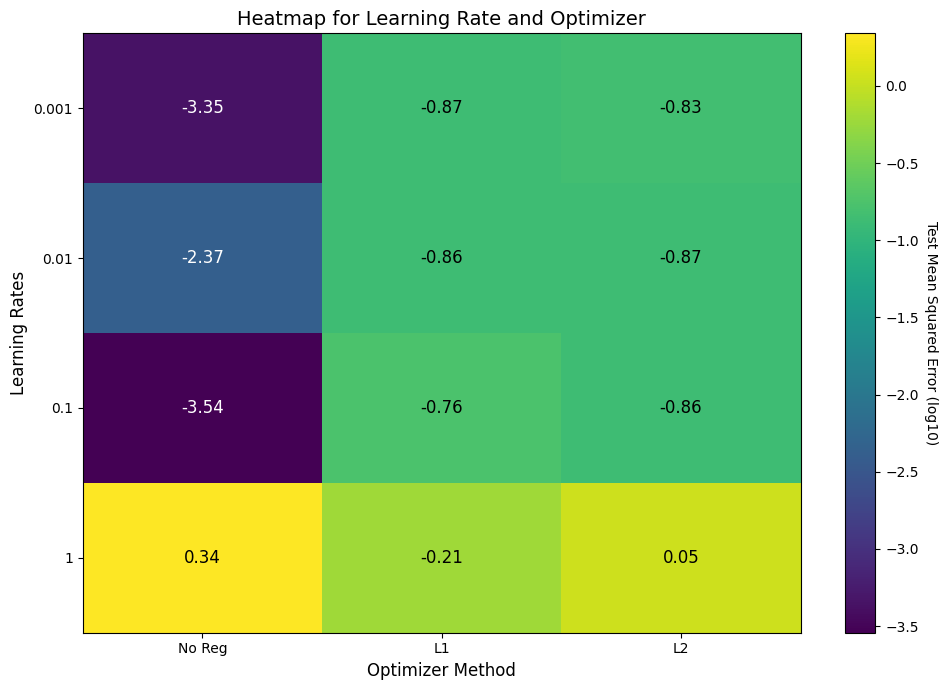

In [16]:
# Different gradient descent methods and learning rates NOT DONE
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset, ReLU, der_ReLU, LeakyReLu, der_LeakyReLu
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

np.random.seed(42)

n_samples = 18
x, y_true, y_noise = dataset(n_samples)
scaler = StandardScaler()
X = scaler.fit_transform(x.reshape(-1, 1)) # Feature matrix (n_samples
y = y_true - np.mean(y_true)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Network Architecture
n_inputs = 1
learning_rates = [ 1,0.1, 0.01, 0.001]
methods = ['SGD', 'RMSprop', 'Adam', 'GD']
activationFunction = [[ReLU, der_ReLU], [LeakyReLu, der_LeakyReLu], [sigmoid, der_sigmoid], [linear, der_linear]]
Regularization = [None, "L1", "L2"]
Regularization_names = ["No Reg", "L1", "L2"]

epochs = 10000
layer_output_sizes = [50, 50, 1]
activations = [sigmoid, sigmoid, linear]
activation_ders = [der_sigmoid, der_sigmoid, der_linear]
cost_func = mse
cost_der_func = der_mse

mse_matrix = np.zeros((len(learning_rates), len(Regularization)))


method = 'Adam'
# Optimizer 
batch_size = 5
epsilon = 1e-8
# RMSprop
beta_rms = 0.9
# Adam
beta1_adam = 0.9
beta2_adam = 0.999


plt.figure(figsize=(10, 6))


for n_i, learning_rate in enumerate(learning_rates):
    print(f"\nTesting learning rate: {learning_rate}")
    for n_j, regularization in enumerate(Regularization):
        print(f"  Testing method: {methods}")
        start_time = time.perf_counter() # Using perf_counter for more precise measurements
        nn = NeuralNetwork(
            network_input_size=n_inputs,
            layer_output_sizes=layer_output_sizes,
            activation_funcs=activations,
            activation_ders=activation_ders,
            cost_fun=cost_func,
            cost_der=cost_der_func,
            regularization_type=regularization,
            regularization=0.01,
            seed=42
        )
        if method == 'RMSprop':
            # List of (w, b) tuples for squared gradient averages
            Eg = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
        elif method == 'Adam':
            # Lists for 1st and 2nd moment estimates
            m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
            t = 0 # Adam's timestep counter


        for i in range(epochs):

            if method == 'GD' :
                grads = nn.compute_gradient(X_train, y_train)
                grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                nn.update_weights(grads)
            else:
                # Stochastic methods with mini-batches
                n_samples = X_train.shape[0]
                indices = np.arange(n_samples)
                np.random.shuffle(indices)
                X_train_shuffled = X_train[indices]
                y_train_shuffled = y_train[indices]

                # 2. Loop over mini-batches
                for start_idx in range(0, n_samples, batch_size):
                    # Get the mini-batch
                    end_idx = min(start_idx + batch_size, n_samples)
                    X_batch = X_train_shuffled[start_idx:end_idx]
                    y_batch = y_train_shuffled[start_idx:end_idx]

                    grads = nn.compute_gradient(X_batch, y_batch)
                    update = []
                    if method == 'SGD':
                        # Standard SGD update
                        update = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
                    elif method == 'RMSprop':
                        for l in range(len(grads)):
                            (dW, db) = grads[l]
                            (Eg_w, Eg_b) = Eg[l] # Get state

                            # Update state
                            Eg_w = beta_rms * Eg_w + (1 - beta_rms) * (dW**2)
                            Eg_b = beta_rms * Eg_b + (1 - beta_rms) * (db**2)
                            Eg[l] = (Eg_w, Eg_b) # Save state

                            # Compute update
                            update_dW = (learning_rate / (np.sqrt(Eg_w + epsilon))) * dW
                            update_db = (learning_rate / (np.sqrt(Eg_b + epsilon))) * db
                            update.append((update_dW, update_db))
                    elif method == 'Adam':
                        t += 1 # Increment timestep (one per batch)
                        for l in range(len(grads)):
                            dW, db = grads[l]
                            m_w, m_b = m[l] # Get 1st moment
                            v_w, v_b = v[l] # Get 2nd moment

                            # 1. Update biased 1st moment estimate
                            m_w = beta1_adam * m_w + (1 - beta1_adam) * dW
                            m_b = beta1_adam * m_b + (1 - beta1_adam) * db
                            
                            # 2. Update biased 2nd moment estimate
                            v_w = beta2_adam * v_w + (1 - beta2_adam) * (dW**2)
                            v_b = beta2_adam * v_b + (1 - beta2_adam) * (db**2)

                            # Store updated moments
                            m[l] = (m_w, m_b)
                            v[l] = (v_w, v_b)

                            # 3. Bias correction
                            m_w_corr = m_w / (1 - beta1_adam**t)
                            m_b_corr = m_b / (1 - beta1_adam**t)
                            v_w_corr = v_w / (1 - beta2_adam**t)
                            v_b_corr = v_b / (1 - beta2_adam**t)

                            # 4. Compute update step
                            update_dW = (learning_rate / (np.sqrt(v_w_corr) + epsilon)) * m_w_corr
                            update_db = (learning_rate / (np.sqrt(v_b_corr) + epsilon)) * m_b_corr
                            update.append((update_dW, update_db))
                    nn.update_weights(update)
                    
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"    Time taken: {elapsed_time:.4f} seconds")
        final_cost = nn.cost(X_test, y_test)

        mse_matrix[n_i, n_j] = final_cost

# MSE Heatmap
plot_mse = np.log10(mse_matrix, where=mse_matrix > 0, out=np.full_like(mse_matrix, np.nan))

fig, ax = plt.subplots(figsize=(10, 7))
c = ax.imshow(plot_mse, cmap='viridis', aspect='auto', origin='lower')

# Set labels and titles
ax.set_title('Heatmap for Learning Rate and Optimizer', fontsize=14)
# FIX: X-axis is methods, not epochs
ax.set_xlabel('Optimizer Method', fontsize=12)
ax.set_ylabel('Learning Rates', fontsize=12)

# FIX: Set tick labels to match the grid search
ax.set_xticks(np.arange(len(Regularization_names)))
ax.set_xticklabels(Regularization_names)
ax.set_yticks(np.arange(len(learning_rates)))
ax.set_yticklabels(learning_rates)

# FIX: Add text labels to each cell
threshold = np.nanmean(plot_mse) # Use nanmean to avoid issues
# FIX: Loop over methods, not epochs
for i in range(len(learning_rates)):
    for j in range(len(Regularization_names)):
        val = plot_mse[i, j]
        if np.isfinite(val): # Only plot finite numbers
            color = "w" if val < threshold else "k"
            text = ax.text(j, i, f"{val:.2f}",
                           ha="center", va="center", color=color, fontsize=12)

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log10)', rotation=-90, va="bottom")

plt.tight_layout()
plt.show()




### Code

### Results

# Classification Section

## F
Change the cost function in b,d,e and perform classification analysis on MNIST problem. Evaluate the results using the Accuracy score, with a critical analysis on the parameters, activation functions and architecture of the network. Compare the results with similar results from Scikit-learn. 

### Code

In [33]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
print(mnist.data.shape)

(70000, 784)


Epoch 1/10 | Test Cost: 0.275445
Epoch 2/10 | Test Cost: 0.238274
Epoch 3/10 | Test Cost: 0.230647
Epoch 4/10 | Test Cost: 0.242753
Epoch 5/10 | Test Cost: 0.247349
Epoch 6/10 | Test Cost: 0.263288
Epoch 7/10 | Test Cost: 0.272674
Epoch 8/10 | Test Cost: 0.290277
Epoch 9/10 | Test Cost: 0.336181
Epoch 10/10 | Test Cost: 0.385087
Final Test Cost (Cross-Entropy) on MNIST: 0.385087


<Figure size 1000x600 with 0 Axes>

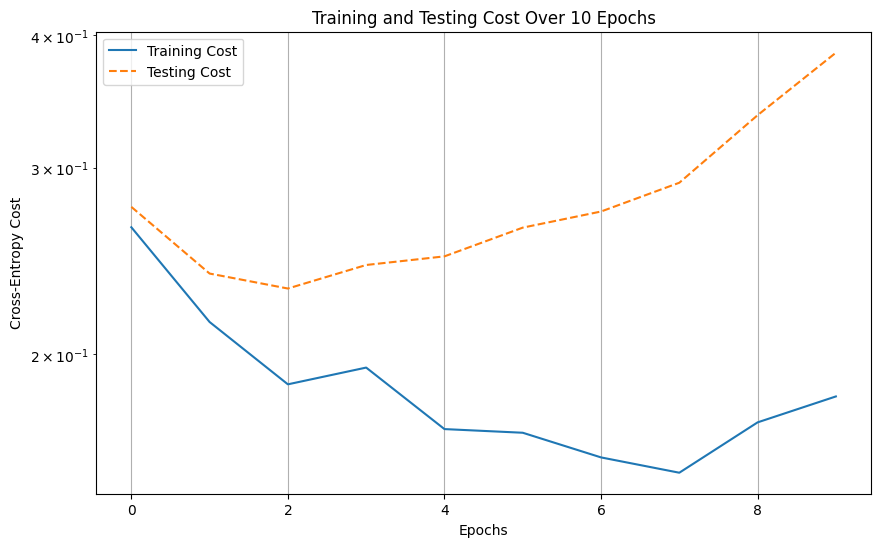

Final Test MSE on MNIST: 0.385087
Final Test Accuracy on MNIST: 96.45%
Final Test Accuracy on MNIST: 94.66%
Best model test cost: 0.230647


In [37]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from Functions import NeuralNetwork, mse, der_mse, sigmoid, der_sigmoid, linear, der_linear, dataset, softmax, der_softmax,cross_entropy, ReLU, der_ReLU
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy


mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target
y = y.astype(int)
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

epochs = 10
n_inputs = X.shape[1]
layer_output_sizes = [100, 100, 10]
activations = [sigmoid, sigmoid, softmax]
activation_ders = [der_sigmoid, der_sigmoid, der_softmax]
cost_func = cross_entropy
cost_der_func = der_softmax



method = 'Adam'
learning_rate = 0.001
# Optimizer 
batch_size = 32
epsilon = 1e-8
# RMSprop
beta_rms = 0.9
# Adam
beta1_adam = 0.9
beta2_adam = 0.999

training_costs = []
testing_costs = []

plt.figure(figsize=(10, 6))


best_model = None
best_model_score = float('inf')

# Using perf_counter for more precise measurements
nn = NeuralNetwork(
        network_input_size=n_inputs,
        layer_output_sizes=layer_output_sizes,
        activation_funcs=activations,
        activation_ders=activation_ders,
        cost_fun=cost_func,
        cost_der=cost_der_func,
        seed=42
    )

if method == 'Adam':
    # Lists for 1st and 2nd moment estimates
    m = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
    v = [(np.zeros_like(w), np.zeros_like(b)) for w, b in nn.layers]
    t = 0 # Adam's timestep counter
for i in range(epochs):
     # Using perf_counter for more precise measurement
    
    if method == 'GD' :
        grads = nn.compute_gradient(X_train, y_train)
        grads = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
        nn.update_weights(grads)
    else:
        # Stochastic methods with mini-batches
        n_samples = X_train.shape[0]
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_train_shuffled = X_train[indices]
        y_train_shuffled = y_train[indices]
        # 2. Loop over mini-batches
        for start_idx in range(0, n_samples, batch_size):
            # Get the mini-batch
            end_idx = min(start_idx + batch_size, n_samples)
            X_batch = X_train_shuffled[start_idx:end_idx]
            y_batch = y_train_shuffled[start_idx:end_idx]
            grads = nn.compute_gradient(X_batch, y_batch)
            update = []
            if method == 'SGD':
                # Standard SGD update
                update = [(dW * learning_rate, db * learning_rate) for dW, db in grads]
            elif method == 'RMSprop':
                for l in range(len(grads)):
                    (dW, db) = grads[l]
                    (Eg_w, Eg_b) = Eg[l] # Get state
                    # Update state
                    Eg_w = beta_rms * Eg_w + (1 - beta_rms) * (dW**2)
                    Eg_b = beta_rms * Eg_b + (1 - beta_rms) * (db**2)
                    Eg[l] = (Eg_w, Eg_b) # Save state
                    # Compute update
                    update_dW = (learning_rate / (np.sqrt(Eg_w + epsilon))) * dW
                    update_db = (learning_rate / (np.sqrt(Eg_b + epsilon))) * db
                    update.append((update_dW, update_db))
            elif method == 'Adam':
                t += 1 # Increment timestep (one per batch)
                for l in range(len(grads)):
                    dW, db = grads[l]
                    m_w, m_b = m[l] # Get 1st moment
                    v_w, v_b = v[l] # Get 2nd moment
                    # 1. Update biased 1st moment estimate
                    m_w = beta1_adam * m_w + (1 - beta1_adam) * dW
                    m_b = beta1_adam * m_b + (1 - beta1_adam) * db
                    
                    # 2. Update biased 2nd moment estimate
                    v_w = beta2_adam * v_w + (1 - beta2_adam) * (dW**2)
                    v_b = beta2_adam * v_b + (1 - beta2_adam) * (db**2)
                    # Store updated moments
                    m[l] = (m_w, m_b)
                    v[l] = (v_w, v_b)
                    # 3. Bias correction
                    m_w_corr = m_w / (1 - beta1_adam**t)
                    m_b_corr = m_b / (1 - beta1_adam**t)
                    v_w_corr = v_w / (1 - beta2_adam**t)
                    v_b_corr = v_b / (1 - beta2_adam**t)
                    # 4. Compute update step
                    update_dW = (learning_rate / (np.sqrt(v_w_corr) + epsilon)) * m_w_corr
                    update_db = (learning_rate / (np.sqrt(v_b_corr) + epsilon)) * m_b_corr
                    update.append((update_dW, update_db))
            nn.update_weights(update)
    if (nn.cost(X_test, y_test) < best_model_score):
                best_model_score = nn.cost(X_test, y_test)
                best_model = copy.deepcopy(nn)
    cost_train = nn.cost(X_train, y_train)
    cost_test = nn.cost(X_test, y_test)
    training_costs.append(cost_train)
    testing_costs.append(cost_test)
    
    if (i + 1) % 1 == 0:
        print(f"Epoch {i+1}/{epochs} | Test Cost: {cost_test:.6f}")
            

final_cost = nn.cost(X_test, y_test)
print(f"Final Test Cost (Cross-Entropy) on MNIST: {final_cost:.6f}")

# --- Plotting Section ---
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), training_costs, label='Training Cost')
plt.plot(range(epochs), testing_costs, '--', label='Testing Cost')
plt.title(f'Training and Testing Cost Over {epochs} Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Cost')
plt.yscale('log') # Use log scale as cost drops quickly
plt.legend()
plt.grid(True)
plt.show()

final_cost = nn.cost(X_test, y_test)
print(f"Final Test MSE on MNIST: {final_cost:.6f}")

test_predictions = nn.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(predicted_labels == true_labels)
print(f"Final Test Accuracy on MNIST: {accuracy * 100:.2f}%")

test_predictions = best_model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(predicted_labels == true_labels)
print(f"Final Test Accuracy on MNIST: {accuracy * 100:.2f}%")
print(f"Best model test cost: {best_model_score:.6f}")





### Results

## G
Summarization of all the algorithms and the results to give a critical evaluation of their pros and cons. Which algorithm worked best for the regression case and which is best for the classification case  

### Results

# CheckList

## Summary of methods to implement and analyze

**Required Implementation:**
1. Reuse the regression code and results from project 1, these will act as a benchmark for seeing how suited a neural network is for this regression task.

2. Implement a neural network with

  * A flexible number of layers

  * A flexible number of nodes in each layer

  * A changeable activation function in each layer (Sigmoid, ReLU, LeakyReLU, as well as Linear and Softmax)

  * A changeable cost function, which will be set to MSE for regression and cross-entropy for multiple-classification

  * An optional L1 or L2 norm of the weights and biases in the cost function (only used for computing gradients, not interpretable metrics)

3. Implement the back-propagation algorithm to compute the gradient of your neural network

4. Reuse the implementation of Plain and Stochastic Gradient Descent from Project 1 (and adapt the code to work with the your neural network)

  * With no optimization algorithm

  * With RMS Prop

  * With ADAM

5. Implement scaling and train-test splitting of your data, preferably using sklearn

6. Implement and compute metrics like the MSE and Accuracy

### Required Analysis:

1. Briefly show and argue for the advantages and disadvantages of the methods from Project 1.

2. Explore and show the impact of changing the number of layers, nodes per layer, choice of activation function, and inclusion of L1 and L2 norms. Present only the most interesting results from this exploration. 2D Heatmaps will be good for this: Start with finding a well performing set of hyper-parameters, then change two at a time in a range that shows good and bad performance.

3. Show and argue for the advantages and disadvantages of using a neural network for regression on your data

4. Show and argue for the advantages and disadvantages of using a neural network for classification on your data

5. Show and argue for the advantages and disadvantages of the different gradient methods and learning rates when training the neural network

### Optional (Note that you should include at least two of these in the report):

1. Implement Logistic Regression as simple classification model case (equivalent to a Neural Network with just the output layer)

2. Compute the gradient of the neural network with autograd, to show that it gives the same result as your hand-written backpropagation.

3. Compare your results with results from using a machine-learning library like pytorch (https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

4. Use a more complex classification dataset instead, like the fashion MNIST (see <https://www.kaggle.com/datasets/zalando-research/fashionmnist>)

5. Use a more complex regression dataset instead, like the two-dimensional Runge function $f(x,y)=\left[(10x - 5)^2 + (10y - 5)^2 + 1 \right]^{-1}$, or even more complicated two-dimensional functions (see the supplementary material of <https://www.nature.com/articles/s41467-025-61362-4> for an extensive list of two-dimensional functions). 

6. Compute and interpret a confusion matrix of your best classification model (see <https://www.researchgate.net/figure/Confusion-matrix-of-MNIST-and-F-MNIST-embeddings_fig5_349758607>)

## Background literature

1. The text of Michael Nielsen is highly recommended, see Nielsen's book at <http://neuralnetworksanddeeplearning.com/>. It is an excellent read.

2. Goodfellow, Bengio and Courville, Deep Learning at <https://www.deeplearningbook.org/>. Here we recommend chapters 6, 7 and 8

3. Raschka et al. at <https://sebastianraschka.com/blog/2022/ml-pytorch-book.html>. Here we recommend chapters 11, 12 and 13.